# *CS540 PROJECT : CS CHATBOT*

-**_by TEAM F_**
- **Pavithra Govardhanan**
- **Saptarshi Chatterjee**
- **Shree Harini Ravichandran**
- **Rusha Lawande**




### Importing Packages 

In [1]:

import numpy
import random
import json
import pickle
import nltk
import tensorflow as tf
from flask import Flask,render_template
import flask_restful as restful
from flask_restful import reqparse, abort, Api, Resource
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.models import Sequential
from nltk.stem.lancaster import LancasterStemmer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, SpatialDropout1D,SimpleRNN



nltk.download('punkt')

C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

True

In [2]:
from nltk.stem.lancaster import LancasterStemmer
word_stemmer = LancasterStemmer()



### Reading JSON File 

In [3]:
# Readtrain data from the json file
with open("cs_dataset.json") as file:
    data = json.load(file)

### Pre-Processing

In [4]:
try:   
    with open("cache_cs.pickle", "rb") as file:
        vocab, label, train, test = pickle.load(file)

except:

    vocab = []
    y = []
    label = []
    x = []
    train = []
    test = []
  

    for i in data["intents"]:
        for j in i["patterns"]:

            words_token = nltk.word_tokenize(j) 
            vocab.extend(words_token) 
            y.append(i["tag"])
            x.append(words_token)

        if i["tag"] not in label:
            label.append(i["tag"])

   
    for w in vocab:
        if w != "?":
            vocab=word_stemmer.stem(w.lower())
    # vocab = [word_stemmer.stem(w.lower()) for w in vocab if w != "?"]  
    

    label = sorted(label)
    vocab = sorted(list(set(vocab)))


    for _ in range(len(label)):
        out=0
    # out_empty = [0 for _ in range(len(label))]

    for i, j in enumerate(x):
        bow = []
        for w in j:
            stemmed_words=word_stemmer.stem(w)
        # stemmed_words = [word_stemmer.stem(w) for w in j]

        for w in vocab:
            if w in stemmed_words:
                bow.append(1)
            else:
                bow.append(0)

        out_line = out[:]
        out_line[labels.index(y[i])] = 1

        test.append(out_line)
        train.append(bow)
        
    # Convert the two lists (training input list) and (output) into numpy arrays.

    train = numpy.array(train)
    test = numpy.array(test)

    # Write the pre-processed data into the pickle file to use it subsequent time.
    with open("cache_cs.pickle", "wb") as file:
        pickle.dump((vocab, label, train, test), file)


In [5]:
len(vocab)

306

### Bag of Words 

In [6]:
def bag_words(inputs, vocab):
    bagofwords = [0 for _ in range(len(vocab))]

    word = nltk.word_tokenize(inputs)
    # for j in word:
      # word=word_stemmer.stem(j.lower())
    word = [word_stemmer.stem(j.lower()) for j in word]

    for v in word:
        for i, w in enumerate(vocab):
            if v == w:
                bagofwords[i] = 1

    return numpy.array(bagofwords)

### Convolutional Neural Network(CNN) 

In [7]:

cnn_model = Sequential()
cnn_model.add(Embedding(306, 32, input_length=306))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size = 3))
# model.add(LSTM(100))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(173,activation='softmax'))
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 306, 32)           9792      
_________________________________________________________________
conv1d (Conv1D)              (None, 302, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                640050    
_________________________________________________________________
dense_1 (Dense)              (None, 173)               8823      
Total params: 679,273
Trainable params: 679,273
Non-trainable params: 0
__________________________________________________

In [9]:
cnn=cnn_model.fit(train, test, epochs=150,verbose = 2, batch_size=16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
436/436 - 0s - loss: 0.0355 - acc: 0.9942
Epoch 2/150
436/436 - 0s - loss: 0.0351 - acc: 0.9942
Epoch 3/150
436/436 - 0s - loss: 0.0348 - acc: 0.9942
Epoch 4/150
436/436 - 0s - loss: 0.0341 - acc: 0.9942
Epoch 5/150
436/436 - 0s - loss: 0.0317 - acc: 0.9942
Epoch 6/150
436/436 - 0s - loss: 0.0264 - acc: 0.9944
Epoch 7/150
436/436 - 0s - loss: 0.0190 - acc: 0.9954
Epoch 8/150
436/436 - 0s - loss: 0.0135 - acc: 0.9965
Epoch 9/150
436/436 - 0s - loss: 0.0089 - acc: 0.9974
Epoch 10/150
436/436 - 0s - loss: 0.0062 - acc: 0.9980
Epoch 11/150
436/436 - 0s - loss: 0.0036 - acc: 0.9988
Epoch 12/150
436/436 - 0s - loss: 0.0026 - acc: 0.9990
Epoch 13/150
436/436 - 0s - loss: 0.0028 - acc: 0.9992
Epoch 14/150
436/436 - 0s - loss: 0.0018 - acc: 0.9993
Epoch 15/150
436/436 - 0s - loss: 0.0011 - acc: 0.9996
Epoch 16/150
436/436 - 0s - loss: 9.8924e-04 - acc: 0.9995
Epoch 17/150
436/436 - 0s - los

436/436 - 0s - loss: 5.7337e-04 - acc: 0.9996
Epoch 136/150
436/436 - 0s - loss: 5.5752e-04 - acc: 0.9995
Epoch 137/150
436/436 - 0s - loss: 5.4074e-04 - acc: 0.9996
Epoch 138/150
436/436 - 0s - loss: 5.4688e-04 - acc: 0.9995
Epoch 139/150
436/436 - 0s - loss: 5.3372e-04 - acc: 0.9996
Epoch 140/150
436/436 - 0s - loss: 5.2890e-04 - acc: 0.9995
Epoch 141/150
436/436 - 0s - loss: 5.2655e-04 - acc: 0.9996
Epoch 142/150
436/436 - 0s - loss: 5.5396e-04 - acc: 0.9994
Epoch 143/150
436/436 - 0s - loss: 5.3236e-04 - acc: 0.9995
Epoch 144/150
436/436 - 0s - loss: 5.3980e-04 - acc: 0.9995
Epoch 145/150
436/436 - 0s - loss: 5.4911e-04 - acc: 0.9995
Epoch 146/150
436/436 - 0s - loss: 5.3524e-04 - acc: 0.9996
Epoch 147/150
436/436 - 0s - loss: 5.3011e-04 - acc: 0.9996
Epoch 148/150
436/436 - 0s - loss: 5.2977e-04 - acc: 0.9995
Epoch 149/150
436/436 - 0s - loss: 5.4134e-04 - acc: 0.9996
Epoch 150/150
436/436 - 0s - loss: 5.4606e-04 - acc: 0.9996


In [10]:
cnn_model.save('model_cs_cnn.h5')
print("Model saved successfully...")

Model saved successfully...


### Accuracy (CNN) 

In [11]:


scores = cnn_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

436/436 [==============================] - 0s 206us/sample - loss: 5.0211e-04 - acc: 0.9997
Accuracy: 0.99965537


### Graph results of CNN 

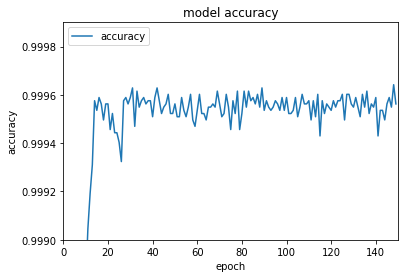

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cnn.history['acc'])
plt.title('model accuracy')
plt.ylim(0.9990,0.9999)
plt.xlim(0,150)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

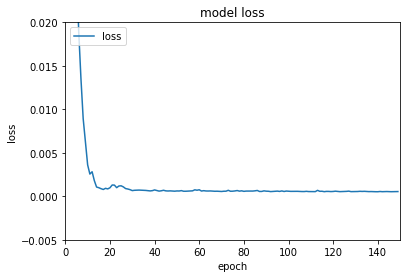

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cnn.history['loss'])
plt.title('model loss')
plt.ylim(-0.005,0.02)
plt.xlim(0,150)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

### Recurrent Neural Network (RNN)

In [15]:

rnn_model = Sequential()
rnn_model.add(Embedding(306, 32, input_length=306))
rnn_model.add(SimpleRNN(128, activation='relu', return_sequences=True))
rnn_model.add(Flatten())
rnn_model.add(Dense(50, activation='relu'))
rnn_model.add(Dense(173,activation='softmax'))
rnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 306, 32)           9792      
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 306, 128)          20608     
_________________________________________________________________
flatten_1 (Flatten)          (None, 39168)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1958450   
_________________________________________________________________
dense_3 (Dense)              (None, 173)               8823      
Total params: 1,997,673
Trainable params: 1,997,673
Non-trainable params: 0
_________________________________________________________________


In [17]:
rnn=rnn_model.fit(train, test, epochs=150,verbose = 2, batch_size=16,validation_split=0.1)

Train on 392 samples, validate on 44 samples
Epoch 1/150
392/392 - 2s - loss: 5.1497 - acc: 0.0077 - val_loss: 5.2168 - val_acc: 0.0000e+00
Epoch 2/150
392/392 - 1s - loss: 5.0665 - acc: 0.0153 - val_loss: 5.7754 - val_acc: 0.0000e+00
Epoch 3/150
392/392 - 1s - loss: 4.8413 - acc: 0.0536 - val_loss: 6.3296 - val_acc: 0.0000e+00
Epoch 4/150
392/392 - 1s - loss: 4.1432 - acc: 0.1378 - val_loss: 8.3339 - val_acc: 0.0000e+00
Epoch 5/150
392/392 - 1s - loss: 2.9207 - acc: 0.3546 - val_loss: 10.7718 - val_acc: 0.0000e+00
Epoch 6/150
392/392 - 1s - loss: 1.9665 - acc: 0.5357 - val_loss: 18.1551 - val_acc: 0.0227
Epoch 7/150
392/392 - 1s - loss: 1.3636 - acc: 0.6990 - val_loss: 21.6647 - val_acc: 0.0000e+00
Epoch 8/150
392/392 - 1s - loss: 0.8750 - acc: 0.7857 - val_loss: 27.3639 - val_acc: 0.0227
Epoch 9/150
392/392 - 2s - loss: 0.7168 - acc: 0.8520 - val_loss: 26.2243 - val_acc: 0.0227
Epoch 10/150
392/392 - 1s - loss: 0.5723 - acc: 0.8699 - val_loss: 25.3585 - val_acc: 0.0000e+00
Epoch 11/1

Epoch 87/150
392/392 - 2s - loss: 0.0576 - acc: 0.9566 - val_loss: 31.5804 - val_acc: 0.0000e+00
Epoch 88/150
392/392 - 1s - loss: 0.0594 - acc: 0.9617 - val_loss: 31.2466 - val_acc: 0.0000e+00
Epoch 89/150
392/392 - 1s - loss: 0.0579 - acc: 0.9490 - val_loss: 30.3710 - val_acc: 0.0000e+00
Epoch 90/150
392/392 - 2s - loss: 0.0537 - acc: 0.9566 - val_loss: 31.5557 - val_acc: 0.0000e+00
Epoch 91/150
392/392 - 2s - loss: 0.0581 - acc: 0.9617 - val_loss: 30.7861 - val_acc: 0.0000e+00
Epoch 92/150
392/392 - 2s - loss: 0.0566 - acc: 0.9541 - val_loss: 30.6829 - val_acc: 0.0000e+00
Epoch 93/150
392/392 - 1s - loss: 0.0554 - acc: 0.9617 - val_loss: 30.9731 - val_acc: 0.0000e+00
Epoch 94/150
392/392 - 1s - loss: 0.0554 - acc: 0.9541 - val_loss: 31.3920 - val_acc: 0.0000e+00
Epoch 95/150
392/392 - 2s - loss: 0.0566 - acc: 0.9515 - val_loss: 30.7139 - val_acc: 0.0000e+00
Epoch 96/150
392/392 - 2s - loss: 0.0555 - acc: 0.9566 - val_loss: 30.3818 - val_acc: 0.0000e+00
Epoch 97/150
392/392 - 1s - lo

### Accuracy (RNN) 

In [19]:
rnn_model.save('model_cs_rnn.h5')
print("Model saved successfully...")

scores = rnn_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

Model saved successfully...
436/436 [==============================] - 0s 673us/sample - loss: 2.0055 - acc: 0.8647
Accuracy: 0.8646789


### Graph results of RNN 

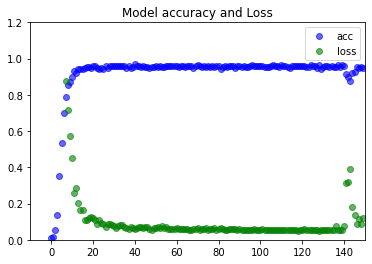

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

acc=rnn.history['acc']
loss=rnn.history['loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'bo', alpha = 0.6, label='acc')
plt.ylim(0,1.2)
plt.xlim(-10,150)
plt.plot(epochs, loss,'go',alpha=0.6, label='loss')
plt.title('Model accuracy and Loss')
plt.legend()

### Long Short Term Memory (LSTM)

In [40]:

lstm_model = Sequential()
lstm_model.add(Embedding(306, 32,input_length = 306))
lstm_model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(173,activation='sigmoid'))
lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])




In [41]:
lstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 306, 32)           9792      
_________________________________________________________________
lstm_8 (LSTM)                (None, 196)               179536    
_________________________________________________________________
dense_6 (Dense)              (None, 173)               34081     
Total params: 223,409
Trainable params: 223,409
Non-trainable params: 0
_________________________________________________________________


In [43]:
lstm=lstm_model.fit(train, test, epochs=150,verbose = 2, batch_size=16,validation_split=0.1)

Train on 392 samples, validate on 44 samples
Epoch 1/150
392/392 - 14s - loss: 0.0825 - acc: 0.9921 - val_loss: 0.0372 - val_acc: 0.9942
Epoch 2/150
392/392 - 14s - loss: 0.0349 - acc: 0.9942 - val_loss: 0.0405 - val_acc: 0.9942
Epoch 3/150
392/392 - 14s - loss: 0.0340 - acc: 0.9942 - val_loss: 0.0429 - val_acc: 0.9942
Epoch 4/150
392/392 - 14s - loss: 0.0338 - acc: 0.9942 - val_loss: 0.0444 - val_acc: 0.9942
Epoch 5/150
392/392 - 14s - loss: 0.0338 - acc: 0.9942 - val_loss: 0.0454 - val_acc: 0.9942
Epoch 6/150
392/392 - 14s - loss: 0.0338 - acc: 0.9942 - val_loss: 0.0463 - val_acc: 0.9942
Epoch 7/150
392/392 - 14s - loss: 0.0338 - acc: 0.9942 - val_loss: 0.0472 - val_acc: 0.9942
Epoch 8/150
392/392 - 13s - loss: 0.0338 - acc: 0.9942 - val_loss: 0.0479 - val_acc: 0.9942
Epoch 9/150
392/392 - 13s - loss: 0.0338 - acc: 0.9942 - val_loss: 0.0487 - val_acc: 0.9942
Epoch 10/150
392/392 - 13s - loss: 0.0338 - acc: 0.9942 - val_loss: 0.0492 - val_acc: 0.9942
Epoch 11/150
392/392 - 13s - loss:

Epoch 89/150
392/392 - 14s - loss: 0.0340 - acc: 0.9942 - val_loss: 0.0668 - val_acc: 0.9942
Epoch 90/150
392/392 - 14s - loss: 0.0341 - acc: 0.9942 - val_loss: 0.0669 - val_acc: 0.9942
Epoch 91/150
392/392 - 14s - loss: 0.0340 - acc: 0.9942 - val_loss: 0.0670 - val_acc: 0.9942
Epoch 92/150
392/392 - 15s - loss: 0.0340 - acc: 0.9942 - val_loss: 0.0671 - val_acc: 0.9942
Epoch 93/150
392/392 - 14s - loss: 0.0340 - acc: 0.9942 - val_loss: 0.0673 - val_acc: 0.9942
Epoch 94/150
392/392 - 14s - loss: 0.0341 - acc: 0.9942 - val_loss: 0.0675 - val_acc: 0.9942
Epoch 95/150
392/392 - 14s - loss: 0.0341 - acc: 0.9942 - val_loss: 0.0673 - val_acc: 0.9942
Epoch 96/150
392/392 - 15s - loss: 0.0339 - acc: 0.9942 - val_loss: 0.0675 - val_acc: 0.9942
Epoch 97/150
392/392 - 15s - loss: 0.0341 - acc: 0.9942 - val_loss: 0.0676 - val_acc: 0.9942
Epoch 98/150
392/392 - 14s - loss: 0.0341 - acc: 0.9942 - val_loss: 0.0677 - val_acc: 0.9942
Epoch 99/150
392/392 - 15s - loss: 0.0340 - acc: 0.9942 - val_loss: 0.

### Accuracy (LSTM) 

In [44]:
lstm_model.save('model_cs_lstm.h5')
print("Model saved successfully...")

scores = lstm_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

Model saved successfully...
436/436 [==============================] - 3s 7ms/sample - loss: 0.0373 - acc: 0.9942
Accuracy: 0.9942197


### Graph results of LSTM

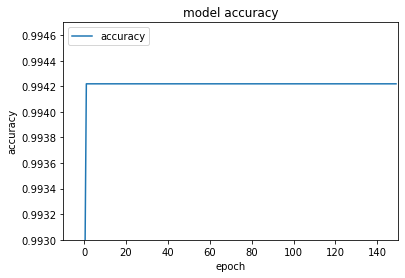

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(lstm.history['acc'])
plt.title('model accuracy')
plt.ylim(0.9930,0.99470)
plt.xlim(-10,150)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()